In [1]:
!wget https://s3.amazonaws.com/keras-file_pathsets/jena_climate_2009_2016.csv.zip
!unzip jena_climate_2009_2016.csv.zip

--2025-04-06 07:36:52--  https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.146.181, 52.217.96.14, 16.182.66.56, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.146.181|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13565642 (13M) [application/zip]
Saving to: ‘jena_climate_2009_2016.csv.zip’

jena_climate_2009_2 100%[===================>]  12.94M  18.7MB/s    in 0.7s    

2025-04-06 07:36:53 (18.7 MB/s) - ‘jena_climate_2009_2016.csv.zip’ saved [13565642/13565642]

Archive:  jena_climate_2009_2016.csv.zip
  inflating: jena_climate_2009_2016.csv  
  inflating: __MACOSX/._jena_climate_2009_2016.csv  


In [3]:
import os
file_path = os.path.join("jena_climate_2009_2016.csv")

In [4]:
with open(file_path) as f:
    file_path = f.read()

In [5]:
climate_records = file_path.split("\n")
column_headers = climate_records[0].split(",")
climate_records = climate_records[1:]
print(column_headers)
print(len(climate_records))
import os
file_path = os.path.join("jena_climate_2009_2016.csv")

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420451


In [6]:
with open(file_path) as f:
    file_path = f.read()

In [7]:
climate_records = file_path.split("\n")
column_headers = climate_records[0].split(",")
climate_records = climate_records[1:]
print(column_headers)
print(len(climate_records))
#Loading and exploring the input data.


['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420451


In [8]:
import numpy as np
temp = np.zeros((len(climate_records),))
original_file_path = np.zeros((len(climate_records), len(column_headers) - 1))
for i, line in enumerate(climate_records):
    values = [float(x) for x in line.split(",")[1:]]
    temp[i] = values[1]
    original_file_path[i, :] = values[:]
import numpy as np
temp = np.zeros((len(climate_records),))
original_file_path = np.zeros((len(climate_records), len(column_headers) - 1))
for i, line in enumerate(climate_records):
    values = [float(x) for x in line.split(",")[1:]]
    temp[i] = values[1]
    original_file_path[i, :] = values[:]
#Plotting the temperature time series from the dataset.

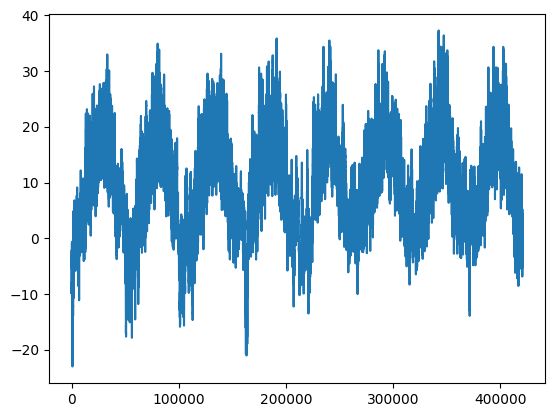

In [9]:
from matplotlib import pyplot as plt
plt.plot(range(len(temp)), temp)
#Plotting temperature trends for the initial 10 days



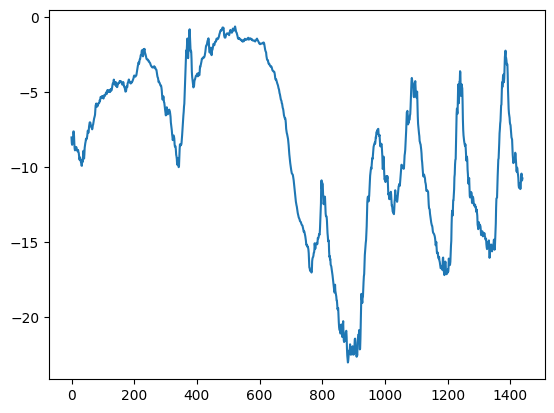

In [10]:
plt.plot(range(1440), temp[:1440])
# Determining dataset split sizes

In [11]:
num_train_samples = int(0.5 * len(original_file_path))
val_original_file_path = int(0.25 * len(original_file_path))
test_Sample_Number = len(original_file_path) - num_train_samples - val_original_file_path
print("train_Sample_Num:", num_train_samples)
print("val_original_file_path:", val_original_file_path)
print("test_Sample_Number:", test_Sample_Number)
# Dataset preparation
#Normalizing the dataset features

train_Sample_Num: 210225
val_original_file_path: 105112
test_Sample_Number: 105114


In [12]:
mean = original_file_path[:num_train_samples].mean(axis=0)
original_file_path -= mean
std = original_file_path[:num_train_samples].std(axis=0)
original_file_path /= std
import numpy as np
from tensorflow import keras
num_series = np.arange(10)
dummy_dataset = keras.utils.timeseries_dataset_from_array(
    data=num_series[:-3],
    targets=num_series[3:],
    sequence_length=3,
    batch_size=2,
)

In [13]:
for inputs, targets in dummy_dataset:
    for i in range(inputs.shape[0]):
        print([int(x) for x in inputs[i]], int(targets[i]))
#Creating datasets for training, validation, and testin

[0, 1, 2] 3
[1, 2, 3] 4
[2, 3, 4] 5
[3, 4, 5] 6
[4, 5, 6] 7


In [14]:
sampling_interval = 6
seq_len = 120
prediction_offset = sampling_interval * (seq_len + 24 - 1)
batch_size = 256

In [15]:
train_file_pathset = keras.utils.timeseries_dataset_from_array(
    original_file_path[:-prediction_offset],
    targets=temp[prediction_offset:],
    sampling_rate=sampling_interval,
    sequence_length=seq_len,
    shuffle=True,
    batch_size=batch_size,
    start_index=0,
    end_index=num_train_samples)

In [16]:
val_file_pathset = keras.utils.timeseries_dataset_from_array(
    original_file_path[:-prediction_offset],
    targets=temp[prediction_offset:],
    sampling_rate=sampling_interval,
    sequence_length=seq_len,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples,
    end_index=num_train_samples + val_original_file_path)

In [17]:
test_file_pathset = keras.utils.timeseries_dataset_from_array(
    original_file_path[:-prediction_offset],
    targets=temp[prediction_offset:],
    sampling_rate=sampling_interval,
    sequence_length=seq_len,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples + val_original_file_path)
#Inspecting a sample batch from the dataset to evaluate structure and content

In [18]:
for samples, targets in train_file_pathset:
    print("samples shape:", samples.shape)
    print("targets shape:", targets.shape)
    break
#A common-sense, non-machine-learning baseline
#Measuring baseline model performance using MAE

samples shape: (256, 120, 14)
targets shape: (256,)


In [19]:
def evaluate_naive_method(file_pathset):
    total_abs_err = 0.
    samples_seen = 0
    for samples, targets in file_pathset:
        preds = samples[:, -1, 1] * std[1] + mean[1]
        total_abs_err += np.sum(np.abs(preds - targets))
        samples_seen += samples.shape[0]
    return total_abs_err / samples_seen

In [20]:
print(f"Validation MAE: {evaluate_naive_method(val_file_pathset):.2f}")
print(f"Test MAE: {evaluate_naive_method(test_file_pathset):.2f}")


Validation MAE: 2.44
Test MAE: 2.62


In [48]:
!pip install tensorflow==2.12

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 853.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 80.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 79.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 101.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 86.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 10.0 MB/s eta 0:00:00
  

In [25]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(seq_len, original_file_path.shape[-1]))
x = layers.Flatten()(inputs)
x = layers.Dense(64, activation="relu")(x)
model_outputs	 = layers.Dense(1)(x)
model = keras.Model(inputs, model_outputs	)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_dense.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_file_pathset,
                    epochs=10,
                    validation_data=val_file_pathset,
                    callbacks=callbacks)

model = keras.models.load_model("jena_dense.keras")
print(f"Test MAE: {model.evaluate(test_file_pathset)[1]:.2f}")


Epoch 1/10
819/819 [==============================] - 42s 51ms/step - loss: 12.5079 - mae: 2.7378 - val_loss: 11.2760 - val_mae: 2.6593
Epoch 2/10
819/819 [==============================] - 41s 49ms/step - loss: 8.3840 - mae: 2.2759 - val_loss: 13.9872 - val_mae: 2.9798
Epoch 3/10
819/819 [==============================] - 41s 50ms/step - loss: 7.2584 - mae: 2.1174 - val_loss: 11.5287 - val_mae: 2.6781
Epoch 4/10
819/819 [==============================] - 42s 51ms/step - loss: 6.5942 - mae: 2.0230 - val_loss: 11.7205 - val_mae: 2.7173
Epoch 5/10
819/819 [==============================] - 49s 60ms/step - loss: 6.1328 - mae: 1.9554 - val_loss: 12.3230 - val_mae: 2.7617
Epoch 6/10
819/819 [==============================] - 40s 49ms/step - loss: 5.7205 - mae: 1.8883 - val_loss: 10.6712 - val_mae: 2.5750
Epoch 7/10
819/819 [==============================] - 49s 59ms/step - loss: 5.4281 - mae: 1.8376 - val_loss: 11.6565 - val_mae: 2.6917
Epoch 8/10
819/819 [==============================] - 

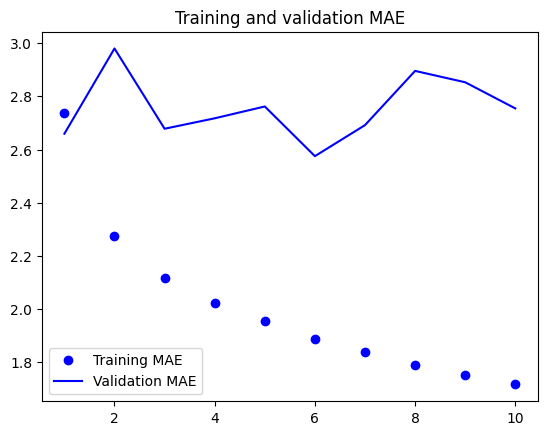

In [30]:
import matplotlib.pyplot as plt
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()
#Let's try a 1D convolutional model
inputs = keras.Input(shape=(seq_len, original_file_path.shape[-1]))
x = layers.Conv1D(8, 24, activation="relu")(inputs)
x = layers.MaxPooling1D(2)(x)
x = layers.Conv1D(8, 12, activation="relu")(x)
x = layers.MaxPooling1D(2)(x)
x = layers.Conv1D(8, 6, activation="relu")(x)
x = layers.GlobalAveragePooling1D()(x)
model_outputs	 = layers.Dense(1)(x)
model = keras.Model(inputs, model_outputs	)

In [31]:
callbacks = [
    keras.callbacks.ModelCheckpoint("jena_conv.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_file_pathset,
                    epochs=10,
                    validation_data=val_file_pathset,
                    callbacks=callbacks)


Epoch 1/10
819/819 [==============================] - 76s 92ms/step - loss: 21.8567 - mae: 3.6682 - val_loss: 16.1385 - val_mae: 3.1958
Epoch 2/10
819/819 [==============================] - 85s 104ms/step - loss: 15.6008 - mae: 3.1440 - val_loss: 15.1834 - val_mae: 3.0821
Epoch 3/10
819/819 [==============================] - 84s 102ms/step - loss: 14.4357 - mae: 3.0209 - val_loss: 16.3196 - val_mae: 3.1743
Epoch 4/10
819/819 [==============================] - 80s 97ms/step - loss: 13.6544 - mae: 2.9343 - val_loss: 16.5629 - val_mae: 3.2109
Epoch 5/10
819/819 [==============================] - 79s 96ms/step - loss: 13.0269 - mae: 2.8599 - val_loss: 15.0297 - val_mae: 3.0587
Epoch 6/10
819/819 [==============================] - 74s 91ms/step - loss: 12.5610 - mae: 2.8051 - val_loss: 16.9485 - val_mae: 3.2316
Epoch 7/10
819/819 [==============================] - 77s 94ms/step - loss: 12.1834 - mae: 2.7606 - val_loss: 15.5334 - val_mae: 3.1007
Epoch 8/10
819/819 [==========================

In [33]:
model = keras.models.load_model("jena_conv.keras")
print(f"Test MAE: {model.evaluate(test_file_pathset)[1]:.2f}")
#Establishing an initial recurrent model as a baseline.
#A simple LSTM-based model

405/405 [==============================] - 17s 40ms/step - loss: 16.0901 - mae: 3.1756
Test MAE: 3.18


In [34]:
inputs = keras.Input(shape=(seq_len, original_file_path.shape[-1]))
x = layers.LSTM(16)(inputs)
model_outputs	 = layers.Dense(1)(x)
model = keras.Model(inputs, model_outputs	)

In [35]:
callbacks = [
    keras.callbacks.ModelCheckpoint("jena_lstm.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_file_pathset,
                    epochs=10,
                    validation_data=val_file_pathset,
                    callbacks=callbacks)

Epoch 1/10
819/819 [==============================] - 99s 119ms/step - loss: 37.8345 - mae: 4.4654 - val_loss: 12.1753 - val_mae: 2.6715
Epoch 2/10
819/819 [==============================] - 95s 115ms/step - loss: 10.9784 - mae: 2.5854 - val_loss: 10.0824 - val_mae: 2.4791
Epoch 3/10
819/819 [==============================] - 98s 120ms/step - loss: 9.9057 - mae: 2.4542 - val_loss: 9.9743 - val_mae: 2.4459
Epoch 4/10
819/819 [==============================] - 98s 120ms/step - loss: 9.5329 - mae: 2.4016 - val_loss: 9.9208 - val_mae: 2.4612
Epoch 5/10
819/819 [==============================] - 96s 117ms/step - loss: 9.2077 - mae: 2.3601 - val_loss: 9.3302 - val_mae: 2.3858
Epoch 6/10
819/819 [==============================] - 94s 115ms/step - loss: 8.9401 - mae: 2.3262 - val_loss: 9.2844 - val_mae: 2.3808
Epoch 7/10
819/819 [==============================] - 97s 118ms/step - loss: 8.7727 - mae: 2.3032 - val_loss: 9.4830 - val_mae: 2.4005
Epoch 8/10
819/819 [==============================]

In [36]:
model = keras.models.load_model("jena_lstm.keras")
print(f"Test MAE: {model.evaluate(test_file_pathset)[1]:.2f}")
#Understanding recurrent neural networks
#NumPy implementation of a simple RNN

405/405 [==============================] - 22s 54ms/step - loss: 11.1936 - mae: 2.6500
Test MAE: 2.65


In [ ]:
import numpy as np
timesteps = 100
input_features = 32
output_features = 64
inputs = np.random.random((timesteps, input_features))
state_t = np.zeros((output_features,))
W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))
successive_model_outputs	 = []
for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    successive_model_outputs	.append(output_t)
    state_t = output_t
final_output_sequence = np.stack(successive_model_outputs	, axis=0)
#Initializing a basic RNN using Keras
#RNN layer configured for variable-length input sequences

In [38]:
num_features = 14
inputs = keras.Input(shape=(None, num_features))
model_outputs	 = layers.SimpleRNN(16)(inputs)
#RNN layer that outputs only the final timestep

In [39]:
num_features = 14
steps = 120
inputs = keras.Input(shape=(steps, num_features))
model_outputs	 = layers.SimpleRNN(16, return_sequences=False)(inputs)
print(model_outputs	.shape)
#RNN that provides an output for each input time step

(None, 16)


In [40]:
num_features = 14
steps = 120
inputs = keras.Input(shape=(steps, num_features))
model_outputs	 = layers.SimpleRNN(16, return_sequences=True)(inputs)
print(model_outputs	.shape)
#Stacking RNN layers

(None, 120, 16)


In [44]:
inputs = keras.Input(shape=(steps, num_features))
x = layers.SimpleRNN(16, return_sequences=True)(inputs)
x = layers.SimpleRNN(16, return_sequences=True)(x)
model_outputs	 = layers.SimpleRNN(16)(x)
#Implementing advanced strategies with recurrent neural networks
# Using recurrent dropout to reduce overfitting in RNNs
#Training and evaluating an LSTM model with dropout

In [43]:
inputs = keras.Input(shape=(seq_len, original_file_path.shape[-1]))
x = layers.LSTM(32, recurrent_dropout=0.25)(inputs)
x = layers.Dropout(0.5)(x)
model_outputs	 = layers.Dense(1)(x)
model = keras.Model(inputs, model_outputs	)

In [48]:
callbacks = [
    keras.callbacks.ModelCheckpoint("jena_lstm_dropout.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_file_pathset,
                    epochs=10,
                    validation_data=val_file_pathset,
                    callbacks=callbacks)
inputs = keras.Input(shape=(seq_len, num_features))
x = layers.LSTM(32, recurrent_dropout=0.2, unroll=True)(inputs)

Epoch 1/10
819/819 [==============================] - 205s 247ms/step - loss: 27.8442 - mae: 3.9003 - val_loss: 9.9011 - val_mae: 2.4406
Epoch 2/10
819/819 [==============================] - 197s 241ms/step - loss: 14.8935 - mae: 2.9958 - val_loss: 9.6251 - val_mae: 2.4112
Epoch 3/10
819/819 [==============================] - 197s 240ms/step - loss: 14.0237 - mae: 2.9047 - val_loss: 9.2187 - val_mae: 2.3601
Epoch 4/10
819/819 [==============================] - 197s 240ms/step - loss: 13.4169 - mae: 2.8417 - val_loss: 9.1934 - val_mae: 2.3485
Epoch 5/10
819/819 [==============================] - 195s 238ms/step - loss: 12.8983 - mae: 2.7864 - val_loss: 9.6893 - val_mae: 2.4267
Epoch 6/10
819/819 [==============================] - 197s 241ms/step - loss: 12.3605 - mae: 2.7273 - val_loss: 9.3112 - val_mae: 2.3646
Epoch 7/10
819/819 [==============================] - 197s 240ms/step - loss: 12.0473 - mae: 2.6941 - val_loss: 9.3193 - val_mae: 2.3620
Epoch 8/10
819/819 [=====================

In [49]:
inputs = keras.Input(shape=(seq_len, original_file_path.shape[-1]))
x = layers.GRU(32, recurrent_dropout=0.5, return_sequences=True)(inputs)
x = layers.GRU(32, recurrent_dropout=0.5)(x)
x = layers.Dropout(0.5)(x)
model_outputs	 = layers.Dense(1)(x)
model = keras.Model(inputs, model_outputs	)